# Laboratorio 2
Javier Ramirez - 21600

Mario Cristales - 21631

## Carga de Datos

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load data into a DataFrame
df = pd.read_csv('movie_statistic_dataset.csv')

### Pre-Procesamiento de Datos

In [4]:
# Select features and target
features = ['movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Production budget $', 'Domestic gross $']
target = 'Worldwide gross $'

# Verificar valores faltantes
print(df[features].isna().sum())

# Reemplazar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

movie_averageRating    0
movie_numerOfVotes     0
approval_Index         0
Production budget $    0
Domestic gross $       0
dtype: int64


#### Normalizar Datos

In [5]:
# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Normalizar la variable objetivo
y = df[target].values.reshape(-1, 1)
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y).flatten()

In [6]:
X = np.asarray(X)
y = np.asarray(y)

### Training Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

## Modelos

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

### Modelo #1: Regularizacion L2, con activacion Relu y 1 capa

In [9]:
# Network 1: Simple Dense Network with L2 regularization
model1 = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Modelo #2: 3 capas y activacion tanh, usando regularizacion dropout

In [10]:
# Network 2: Network with more layers and different activations, with Dropout regularization
model2 = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation="tanh"),
    Dropout(0.5),
    Dense(64, activation='tanh'),
    Dropout(0.5),
    Dense(32, activation='tanh'),
    Dropout(0.5),  # Adding an additional layer
    Dense(16, activation='tanh'),
    Dense(1)
])

### Modelo #3: 4 capas, activacion relu y regularizacion por batch

In [11]:
# Network 3: Network with Batch Normalization and different activation functions
model3 = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),  # Adding an additional layer
    Dense(32, activation='relu'),
    Dense(1)
])

## Compilar Modelos

In [12]:
# Compile models
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

## Entrenar Modelos

In [13]:
# Train models
history1 = model1.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=2)
history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=2)
history3 = model3.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=2)

Epoch 1/100
88/88 - 4s - 41ms/step - loss: 0.8525 - mae: 0.2647 - val_loss: 0.5372 - val_mae: 0.1742
Epoch 2/100
88/88 - 0s - 4ms/step - loss: 0.4122 - mae: 0.1535 - val_loss: 0.3926 - val_mae: 0.1569
Epoch 3/100
88/88 - 0s - 4ms/step - loss: 0.3279 - mae: 0.1490 - val_loss: 0.3281 - val_mae: 0.1543
Epoch 4/100
88/88 - 0s - 4ms/step - loss: 0.2779 - mae: 0.1457 - val_loss: 0.2863 - val_mae: 0.1490
Epoch 5/100
88/88 - 0s - 4ms/step - loss: 0.2445 - mae: 0.1451 - val_loss: 0.2605 - val_mae: 0.1592
Epoch 6/100
88/88 - 0s - 4ms/step - loss: 0.2246 - mae: 0.1473 - val_loss: 0.2406 - val_mae: 0.1424
Epoch 7/100
88/88 - 0s - 5ms/step - loss: 0.2035 - mae: 0.1456 - val_loss: 0.2351 - val_mae: 0.1476
Epoch 8/100
88/88 - 0s - 4ms/step - loss: 0.1909 - mae: 0.1484 - val_loss: 0.2141 - val_mae: 0.1506
Epoch 9/100
88/88 - 0s - 4ms/step - loss: 0.1771 - mae: 0.1452 - val_loss: 0.1984 - val_mae: 0.1475
Epoch 10/100
88/88 - 0s - 4ms/step - loss: 0.1672 - mae: 0.1476 - val_loss: 0.1869 - val_mae: 0.148

In [14]:
# Evaluate models
print("Model 1 Evaluation")
model1.evaluate(X_test, y_test)

print("Model 2 Evaluation")
model2.evaluate(X_test, y_test)

print("Model 3 Evaluation")
model3.evaluate(X_test, y_test)

Model 1 Evaluation
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0729 - mae: 0.1366
Model 2 Evaluation
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1041 - mae: 0.1802
Model 3 Evaluation
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1072 - mae: 0.1500


[0.1171061098575592, 0.1481107473373413]

In [15]:
from sklearn.metrics import r2_score

# Calculate R-squared for each model
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

r2_model1 = r2_score(y_test, y_pred1)
r2_model2 = r2_score(y_test, y_pred2)
r2_model3 = r2_score(y_test, y_pred3)

print("Model 1 R-squared:", r2_model1)
print("Model 2 R-squared:", r2_model2)
print("Model 3 R-squared:", r2_model3)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Model 1 R-squared: 0.9214994119977746
Model 2 R-squared: 0.8840583824155741
Model 3 R-squared: 0.837327309756317


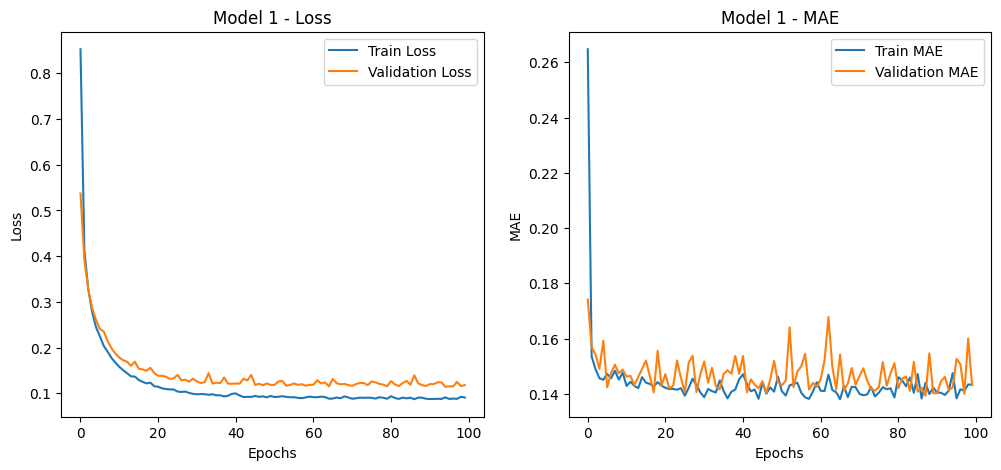

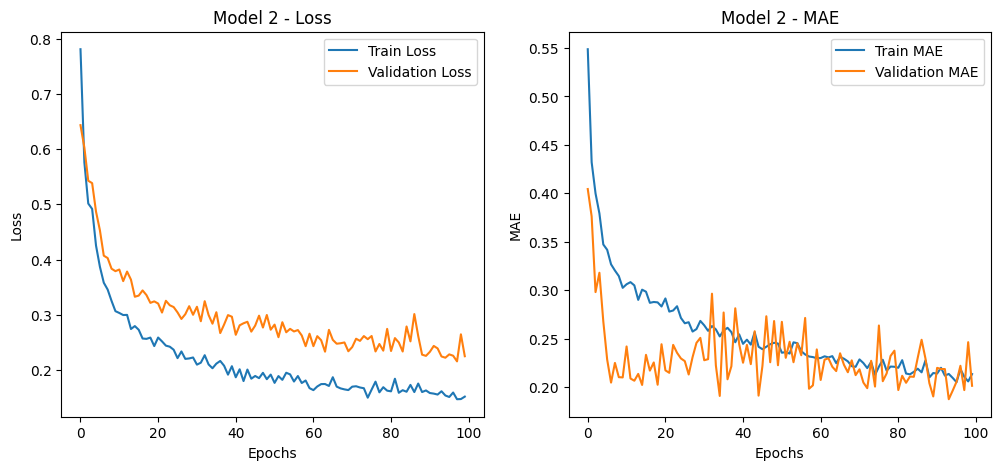

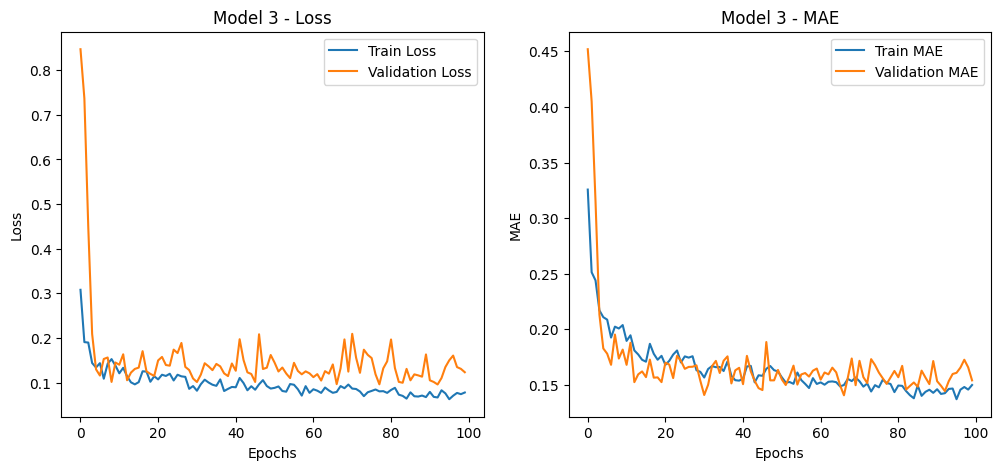

In [16]:
import matplotlib.pyplot as plt

# Function to plot the training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title(f'{title} - MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    
    plt.show()

# Plot histories for all models
plot_history(history1, 'Model 1')
plot_history(history2, 'Model 2')
plot_history(history3, 'Model 3')

# Reporte